# Project : SRGAN 활용하기

## Project 1 : 직접 고른 이미지로 SRGAN 실험하기

### Project 1-1 

In [8]:
# (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
import os
import matplotlib.pyplot as plt

image_file = os.getenv('HOME')+'/aiffel/super_resolution/dog.jpg'

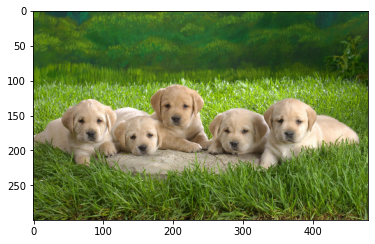

In [17]:
# bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다.

import cv2
import numpy as np
from PIL import Image

dog_img_open = Image.open(image_file)
dog_img = np.array(dog_img_open)
bicubic_img = cv2.resize(dog_img, dsize=(dog_img.shape[1] // 4, dog_img.shape[0] // 4))

plt.imshow(bicubic_img)


In [19]:
# 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [21]:
hr_img = apply_srgan(bicubic_img)

In [24]:
# bicubic_img에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다.

bicubic_img_resize = cv2.resize(bicubic_img, 
                                dsize=(dog_img.shape[1], dog_img.shape[0]),
                               interpolation=cv2.INTER_CUBIC)

Text(0.5, 1.0, 'HR')

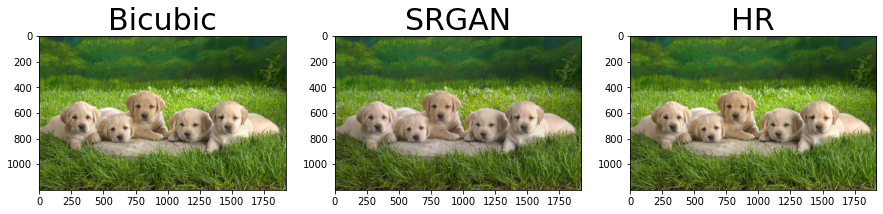

In [32]:
# 3개 이미지(Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지)를 나란히 시각화합니다. 

plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(bicubic_img_resize); plt.title("Bicubic", fontsize=30)
plt.subplot(1,3,2); plt.imshow(hr_img); plt.title("SRGAN", fontsize=30)
plt.subplot(1,3,3); plt.imshow(dog_img); plt.title("HR", fontsize=30)

/opt/conda/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


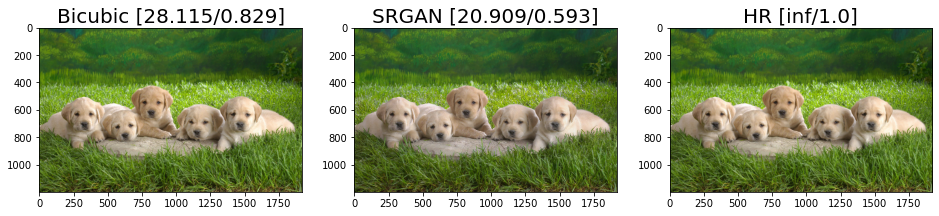

In [33]:
# 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다.

from skimage.metrics import peak_signal_noise_ratio, structural_similarity

images = [bicubic_img_resize, hr_img, dog_img]
titles = ["Bicubic", "SRGAN", "HR"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(dog_img, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(dog_img, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)


- 위의 결과를 통해 Bicubic의 결과값이 SRGAN의 결과값 보다 좋게 나왔음을 확인할 수 있다.
- SRGAN의 성능이 더 좋아야 하는데 왜 이러한 결과가 나왔는지에 대해 생각해본 결과 몇 가지 추측을 할 수 있었다.
    - Genarator가 고해상도의 이미지를 생성하는 과정에 Discriminator를 속여야하기 때문에 이미지를 진짜 같이 만들려고 하다보니 오차가 커진것이라고 가정해볼 수 있다.
    - 입력된 저해상도 이미지의 정보가 부족했기 때문에 고해상도 이미지로 변하는 과정에서 세부적인 정보가 일치하지 않다고 가정해볼 수 있다.

### Project 1-2

In [34]:
# (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

import os
import matplotlib.pyplot as plt

image_file = os.getenv('HOME')+'/aiffel/super_resolution/building.jpg'

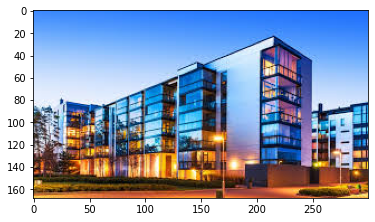

In [35]:
import cv2
import numpy as np
from PIL import Image

building_img_open = Image.open(image_file)
building_img = np.array(building_img_open)

plt.imshow(building_img)

In [45]:
lr_building = cv2.resize(building_img, 
                         dsize=(building_img.shape[1] * 4, building_img.shape[0] * 4))

In [36]:
# 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성

import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_img = apply_srgan(building_img)

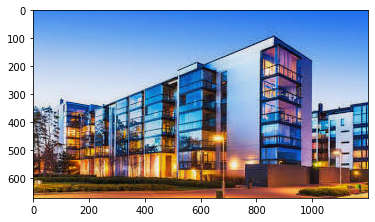

In [37]:
plt.imshow(srgan_img)

In [38]:
# building_img에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다.

building_img_resize = cv2.resize(building_img, 
                                dsize=(building_img.shape[1] * 4, building_img.shape[0] * 4),
                               interpolation=cv2.INTER_CUBIC)

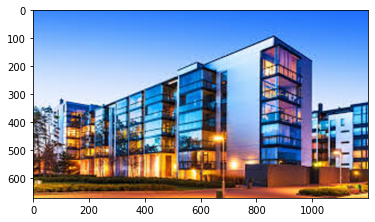

In [39]:
plt.imshow(building_img_resize)

Text(0.5, 1.0, 'SRGAN')

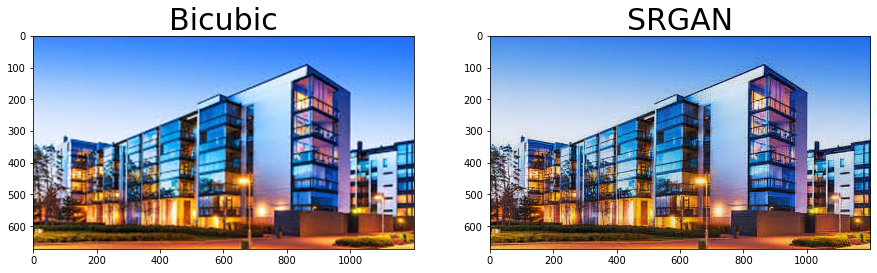

In [44]:
# 2개 이미지(Bicubic의 결과, SRGAN의 결과)를 나란히 시각화합니다. 

plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(building_img_resize); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(srgan_img); plt.title("SRGAN", fontsize=30)

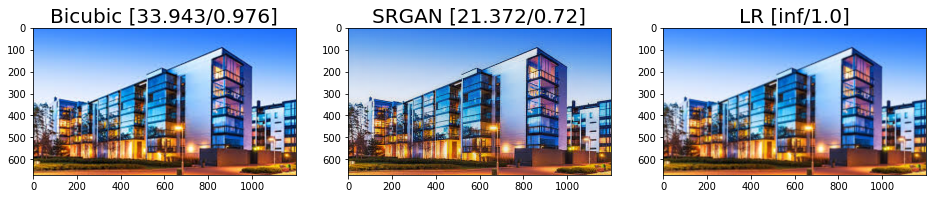

In [46]:
# 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다.

from skimage.metrics import peak_signal_noise_ratio, structural_similarity

images = [building_img_resize, srgan_img, lr_building]
titles = ["Bicubic", "SRGAN", "LR"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(lr_building, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(lr_building, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

- 위의 결과도 마찬가지로 Project 1-1과 같은 가정을 해 볼 수 있다.

## Project 2 : SRGAN을 이용해 고해상도 gif 생성하기

- 이미 학습된 SRGAN을 이용해 저해상도 영상을 고해상도 영상으로 바꿔보는 프로젝트를 수행해 볼 것이다.
- 실제로 동영상의 Super Resolution은 시간 순서에 따른 다수의 프레임 정보를 고려하는 것이 더 좋지만, 처음부터 학습시키기에 많은 시간이 소요된다. 
- 여기서는 이전에 사용했던 SRGAN을 이용해 한 프레임씩 고해상도 이미지로 변환 시켜 모든 프레임에 대해 적용하고, 그 프레임들을 합쳐 동영상으로 만들어 볼 것이다.

### 2-1. gif 파일 불러오기

In [47]:
import os
import cv2

gif_path = os.getenv('HOME')+'/aiffel/super_resolution/book_lr.gif'
gif = cv2.VideoCapture(gif_path)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 22
frame 크기 : (215, 380, 3)


### 2-2. 프레임별 Super Resolution 진행하기

In [48]:
bicubic_frames_sr = []

for frame in frames:
    bicubic_frames_resize = cv2.resize(frame,
                                       dsize=(frame.shape[1] * 4, frame.shape[0] * 4),
                                       interpolation=cv2.INTER_CUBIC)
    bicubic_frames_sr.append(bicubic_frames_resize)

In [49]:
import tensorflow as tf
import os

srgan_frames_sr = []

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

for frame in frames:
    srgan_img = apply_srgan(frame)
    srgan_frames_sr.append(srgan_img)

### 2-3. 프레임을 합쳐 gif 만들기

In [50]:
import imageio

imageio.mimsave("bicubic.gif", bicubic_frames_sr)
imageio.mimsave("srgan.gif", srgan_frames_sr)

### 2-4. Jupyter notebook에 gif 표시하기

- 용량이 커져서 따로 첨부하겠습니다
    - srgan.gif의 경우 30MB 이상되는 용량이라 줄여서 첨부하였습니다.